# Credit Card Fraud Detection - Capstone Final Project UpGrad
# By- Abhishek P

## Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.


## Data Understanding :

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, auc, roc_auc_score, precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.over_sampling import RandomOverSampler

from sklearn import model_selection

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

    pandas (>=0.25.*)
            ~~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Exploratory data analysis

## Reading and understanding the data

In [2]:
# Read csv File from locally stored file :
file_path = r"C:\Users\User\Desktop\Capstone Project Abhishek\creditcard.csv"
df = pd.read_csv(file_path)
df.head()
img = Image.open("credit_card.png")

<IPython.core.display.Javascript object>

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling missing values

#### Handling missing values in columns

In [6]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [7]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [8]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [9]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

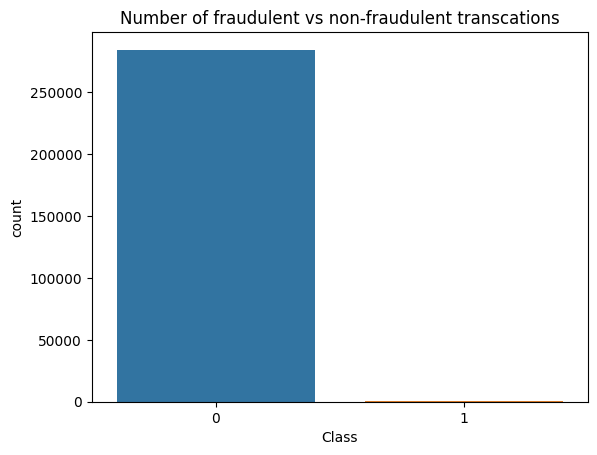

In [10]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.savefig('Number of fraudulent vs non-fraudulent transcations.png')
plt.show()

## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [11]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

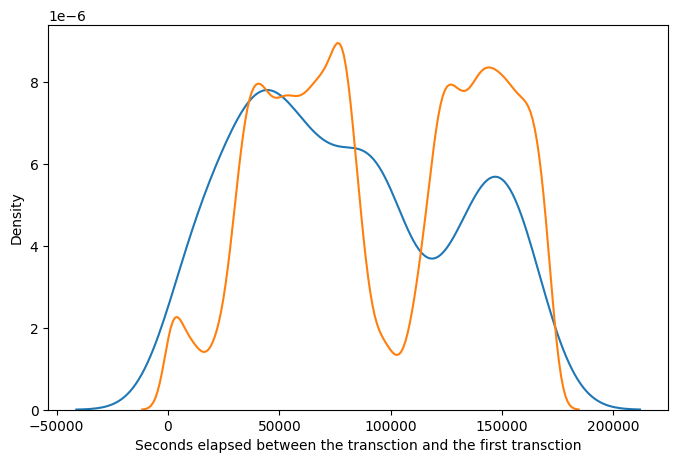

In [12]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.savefig('Seconds elapsed between the transction and the first transction.png')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [13]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

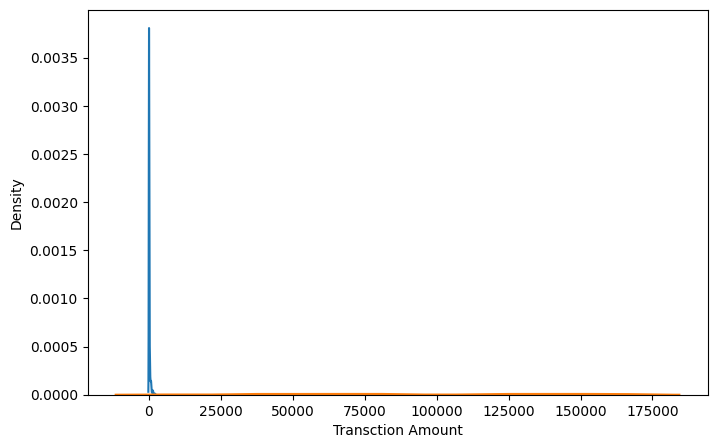

In [14]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.savefig('Transction Amount.png')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount. 

## Train-Test Split

In [15]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [16]:
# Putting target variable to y
y = df['Class']

In [17]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [18]:
# Instantiate the Scaler
scaler = StandardScaler()

In [19]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [20]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [21]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking the Skewness

In [24]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

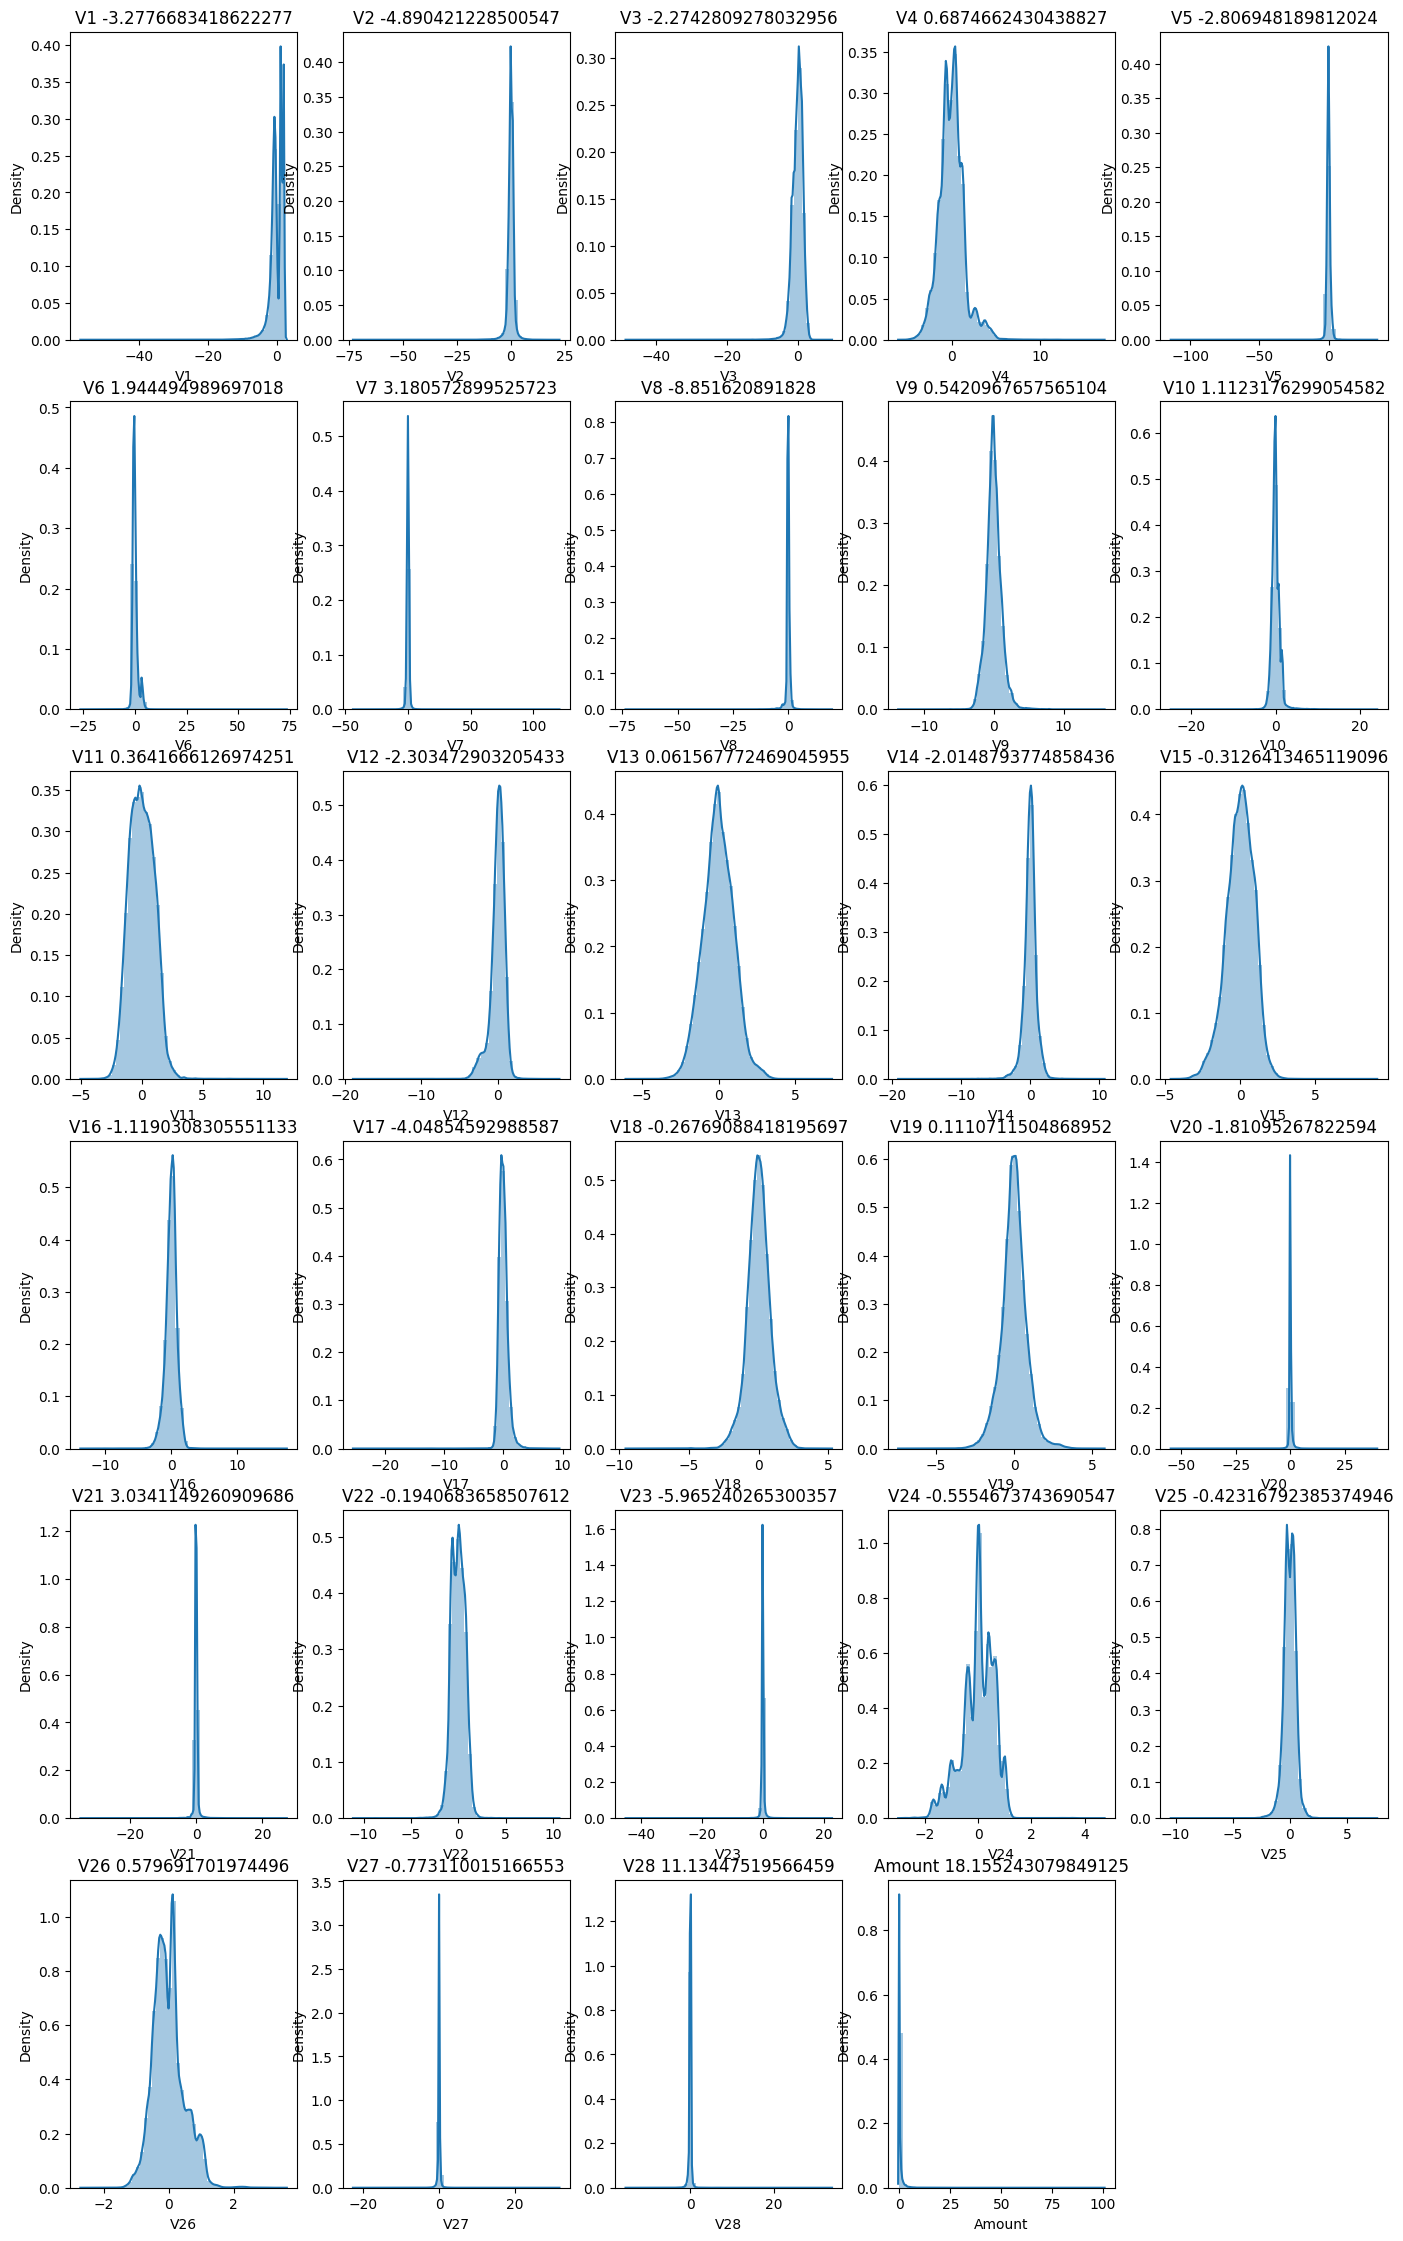

In [25]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))
    plt.savefig(f"Checking the Skewness {col}.png", dpi=300)

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [26]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [27]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

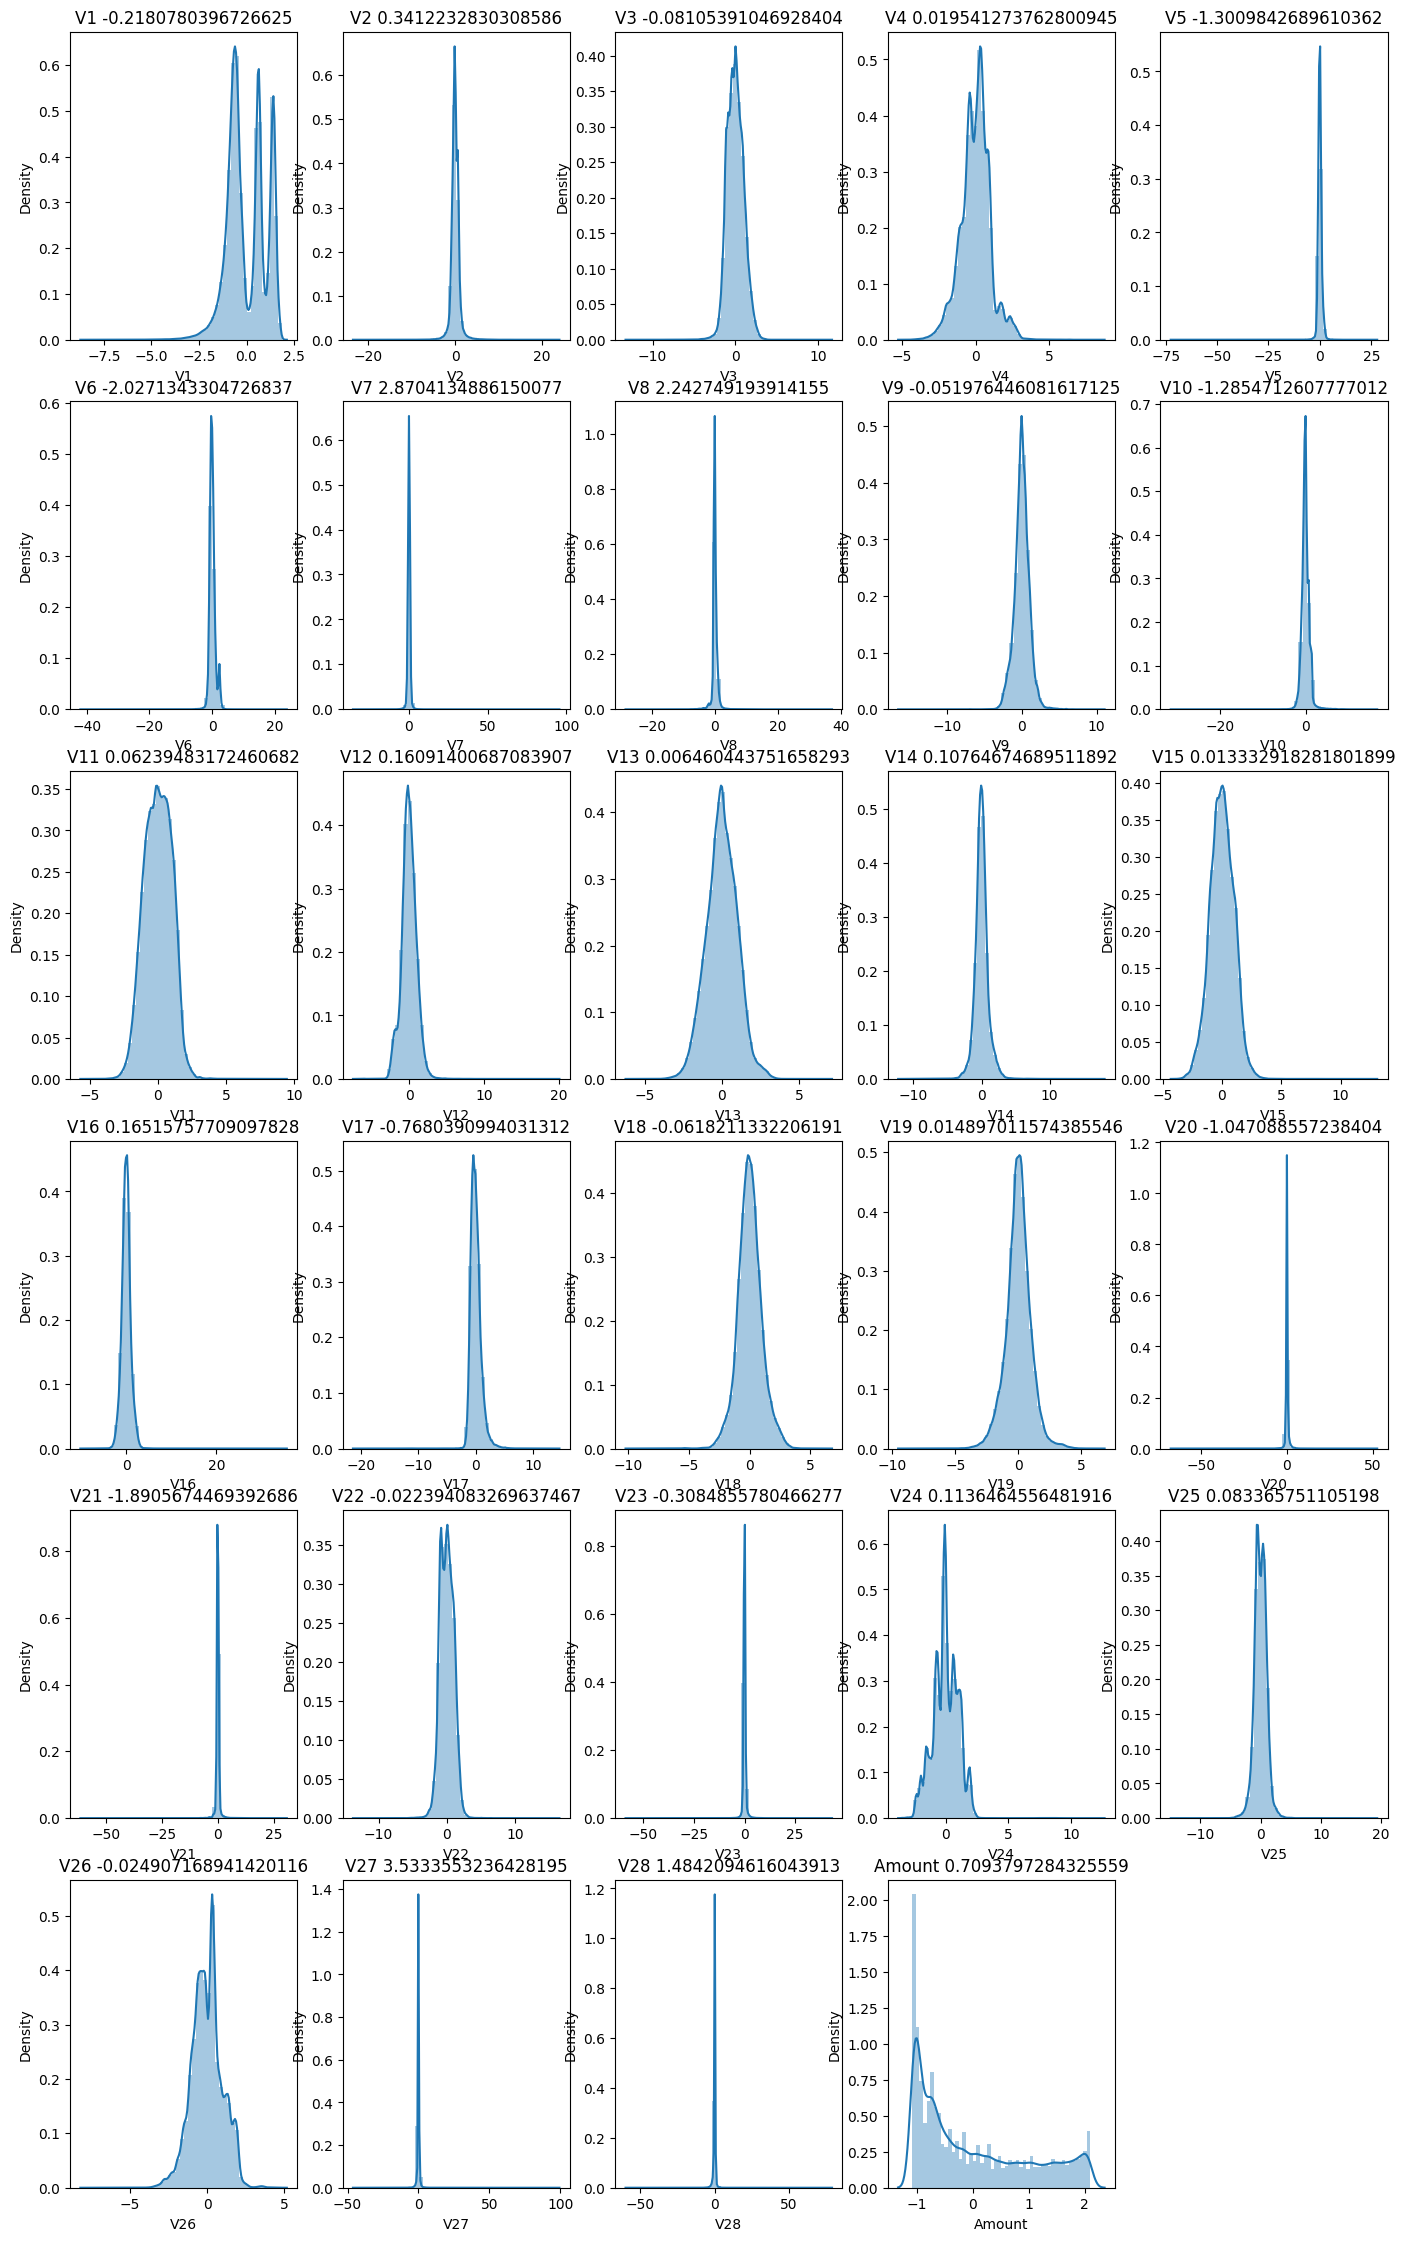

In [28]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))
    plt.savefig(f"Mitigate skweness with PowerTransformer {col}.png", dpi=300)

Now we can see that all the variables are normally distributed after the transformation.

# Model building on imbalanced data

### Metric selection for heavily imbalanced data
As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

### Logistic regression

In [29]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [30]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [32]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.468416,0.089972,0.024603,0.015707,0.01,{'C': 0.01},0.986595,0.987068,0.969244,0.981472,...,0.983674,0.008241,1,0.983877,0.984106,0.988321,0.985739,0.982709,0.984950,0.001943
1,0.549740,0.042959,0.017002,0.000002,0.10,{'C': 0.1},0.985593,0.987368,0.966190,0.980005,...,0.982663,0.009395,2,0.982962,0.983607,0.988169,0.984679,0.981988,0.984281,0.002132
2,0.474685,0.041048,0.017403,0.001357,1.00,{'C': 1},0.985601,0.987346,0.960695,0.979551,...,0.981484,0.011399,3,0.982770,0.983390,0.987509,0.984222,0.981921,0.983962,0.001927
3,0.452387,0.025930,0.016600,0.000800,10.00,{'C': 10},0.985580,0.987338,0.961110,0.979525,...,0.981068,0.010726,4,0.982758,0.983365,0.987466,0.984354,0.980767,0.983742,0.002200
4,0.461796,0.037847,0.016402,0.000490,100.00,{'C': 100},0.985578,0.987338,0.959647,0.979517,...,0.980772,0.011272,5,0.982757,0.983362,0.987354,0.984366,0.980764,0.983721,0.002164
5,0.485188,0.064326,0.017203,0.001471,1000.00,{'C': 1000},0.985578,0.987338,0.959637,0.979519,...,0.980771,0.011275,6,0.982757,0.983362,0.987352,0.984367,0.980764,0.983721,0.002164


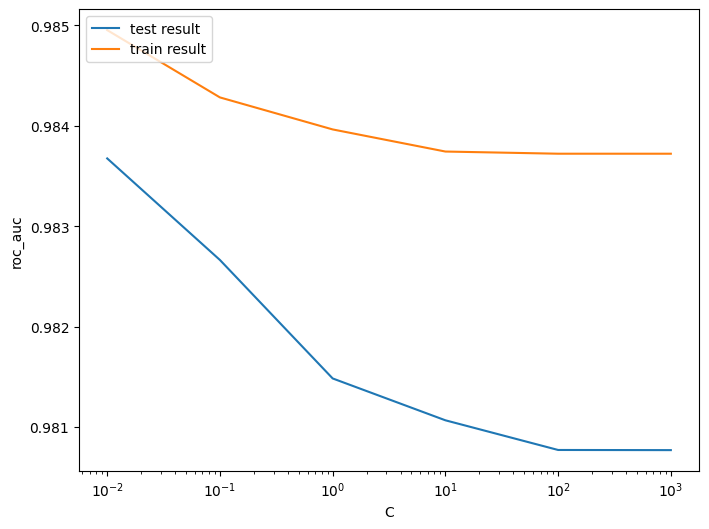

In [33]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.savefig('plot of C versus train and validation scores.png')

In [34]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9836736960858568 at C = 0.01


#### Logistic regression with optimal C

In [35]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [36]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

##### Prediction on the train set

In [38]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [39]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   138    258]]


In [40]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [41]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999297768219623
Sensitivity:- 0.6515151515151515
Specificity:- 0.9999032750198946
F1-Score:- 0.7633136094674556


In [42]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.65      0.76       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



##### ROC on the train set

In [43]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [44]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

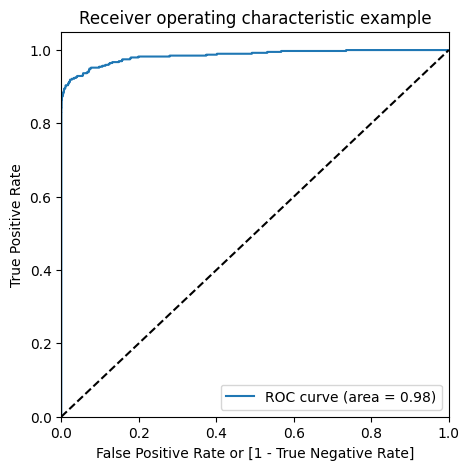

<Figure size 640x480 with 0 Axes>

In [46]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)
plt.savefig('roc_curve1.jpg')
plt.show()

We acheived very good ROC 0.99 on the train set.

#### Prediction on the test set

In [47]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [48]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [49]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [50]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385542


In [51]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



##### ROC on the test set

In [52]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

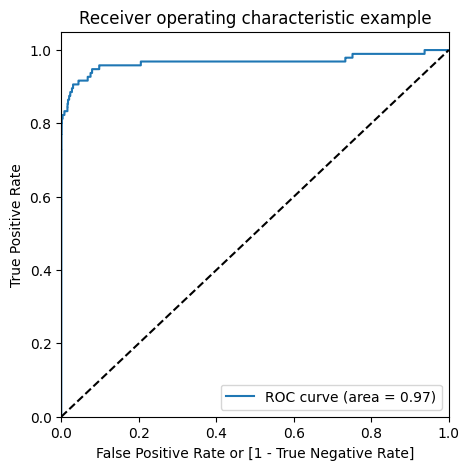

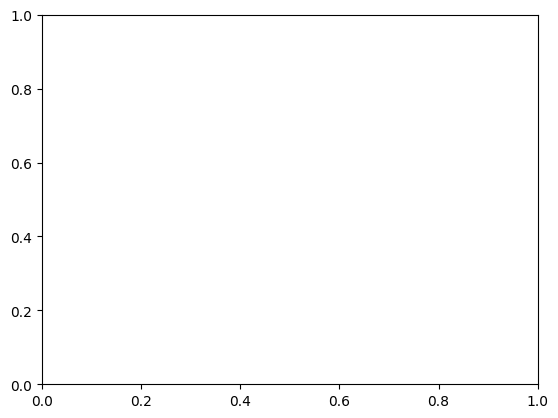

In [53]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)
plt.gca()
plt.savefig('roc_curve2.jpg', dpi=300, bbox_inches='tight')
plt.show()

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.70
    - Specificity = 0.99
    - F1-Score = 0.76
    - ROC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.77
    - Specificity = 0.99
    - F1-Score = 0.65
    - ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

##### Tuning the hyperparameters

In [54]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [55]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.219707,0.242570,0.238425,0.044377,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971504,0.972498,0.978483,0.974161,0.003082,2,0.999582,0.999761,0.999632,0.999658,0.000075
1,9.403112,0.969236,0.265815,0.041611,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969237,0.978238,0.973924,0.973800,0.003676,3,0.999976,0.999969,0.999964,0.999970,0.000005
2,7.715014,0.165425,0.248648,0.019454,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977422,0.973420,0.977898,0.976247,0.002008,1,0.999960,0.999977,0.999954,0.999964,0.000010
3,7.495779,0.089557,0.251598,0.015543,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.959016,0.955137,0.967728,0.960627,0.005265,6,0.999993,0.999959,0.999988,0.999980,0.000015
4,3.414900,0.401637,0.086406,0.001219,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969186,0.962236,0.971101,0.967508,0.003809,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,2.984531,0.049260,0.081308,0.004394,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968313,0.968930,0.977132,0.971458,0.004020,4,1.000000,1.000000,1.000000,1.000000,0.000000


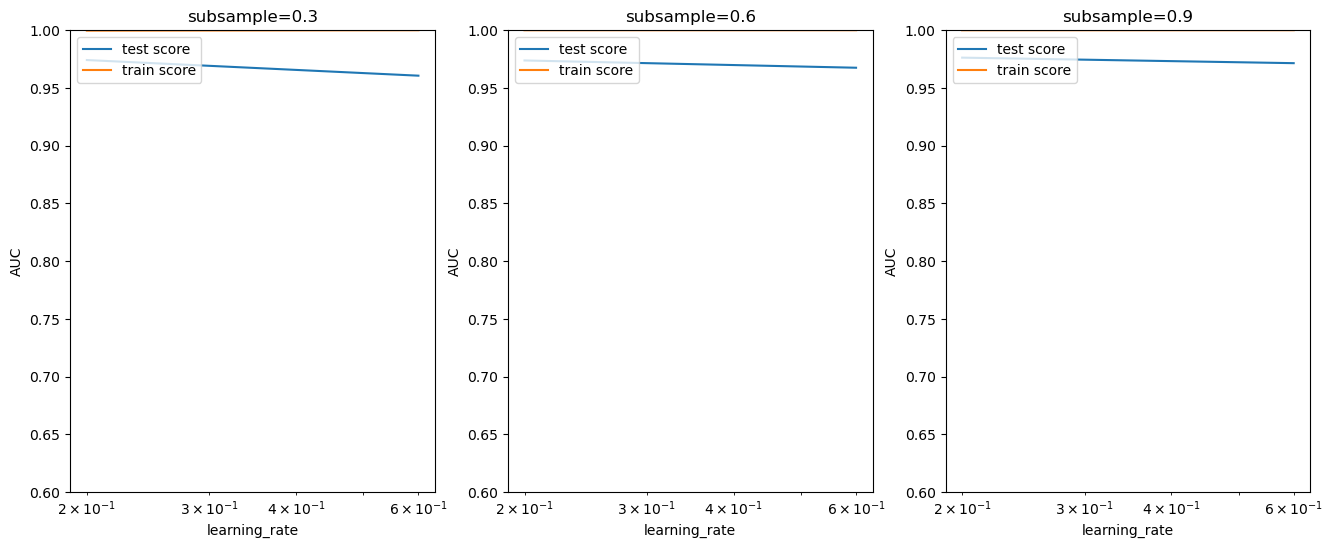

In [56]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [57]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [58]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [59]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [60]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [61]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [63]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [64]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [65]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

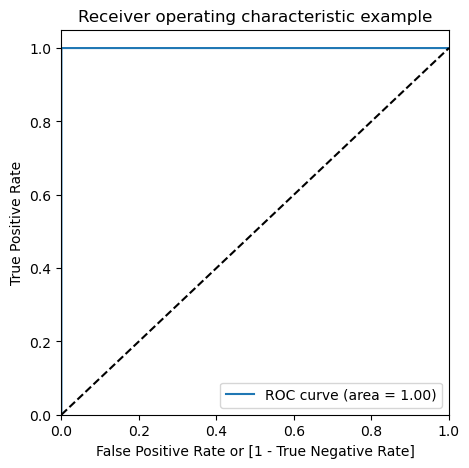

In [66]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)
plt.savefig('roc_curve3.jpg', dpi=300, bbox_inches='tight')

##### Prediction on the test set

In [67]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [68]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56858     8]
 [   25    71]]


In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1-Score:- 0.8114285714285714


In [71]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [72]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [73]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9723599118981465

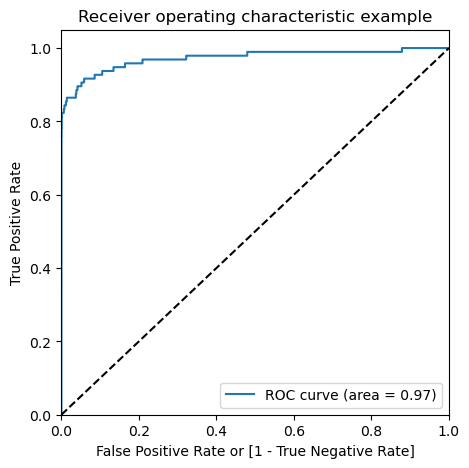

In [74]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)
plt.savefig('roc_curve4.jpg', dpi=300, bbox_inches='tight')

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.85
    - Specificity = 0.99
    - ROC-AUC = 0.99
    - F1-Score = 0.90
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.75
    - Specificity = 0.99
    - ROC-AUC = 0.98
    - F-Score = 0.79

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [75]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [76]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.809044,0.028965,0.037823,0.003343,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930129,0.004428,5
1,4.823796,0.075163,0.040529,0.001510,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923878,0.930133,0.004423,4
2,4.831151,0.020617,0.037638,0.000508,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,4.866201,0.017585,0.038098,0.000901,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
4,9.526163,0.071562,0.042393,0.001959,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917519,0.916475,0.930462,0.921486,0.006362,8
5,9.466554,0.022365,0.040884,0.000937,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924913,0.916451,0.937976,0.926447,0.008854,6
6,9.346230,0.067396,0.038041,0.004297,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933449,0.919693,0.921741,0.924961,0.006060,7
7,9.352961,0.041179,0.042444,0.001903,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933476,0.919682,0.944073,0.932410,0.009986,3


In [77]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [78]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [79]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [80]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [83]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [84]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [85]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

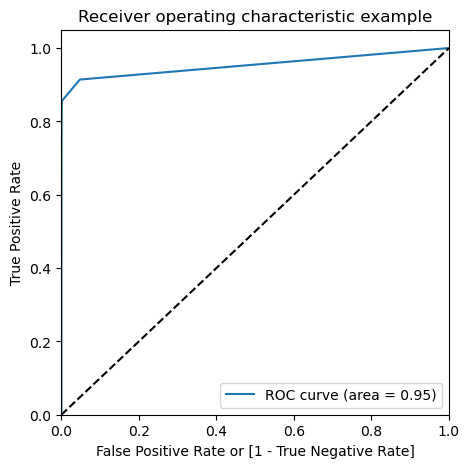

In [86]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)
plt.savefig('roc_curve5.jpg', dpi=300, bbox_inches='tight')

##### Prediction on the test set

In [87]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [88]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [91]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [92]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [93]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

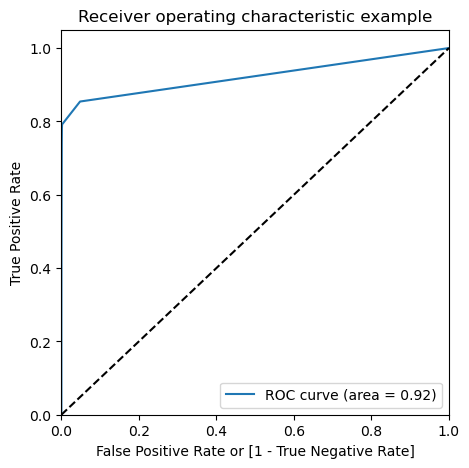

In [94]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)
plt.savefig('roc_curve6.jpg', dpi=300, bbox_inches='tight')

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.75
    - ROC-AUC = 0.95
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.58
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.92


### Random forest

In [95]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [96]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992977680655065 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [97]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [98]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [99]:
##### Prediction on the train set

In [100]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [101]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993811582435428
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8065843621399176


In [104]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.74      0.81       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [105]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [106]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9806335595001405

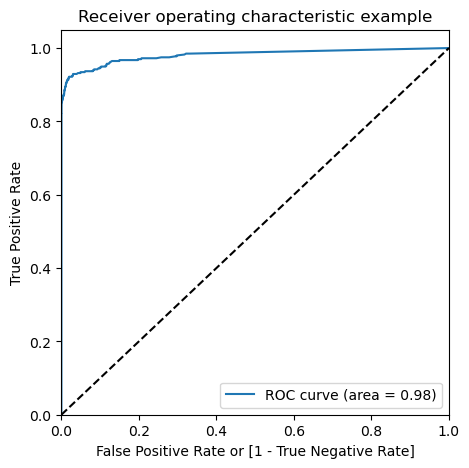

In [107]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)
plt.savefig('roc_curve7.jpg', dpi=300, bbox_inches='tight')

##### Prediction on the test set

In [109]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56844    22]
 [   33    63]]


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990344440153085
Sensitivity:- 0.65625
Specificity:- 0.9996131255935005
F1-Score:- 0.8065843621399176


In [113]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.66      0.70        96

    accuracy                           1.00     56962
   macro avg       0.87      0.83      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [114]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [115]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9541831344740267

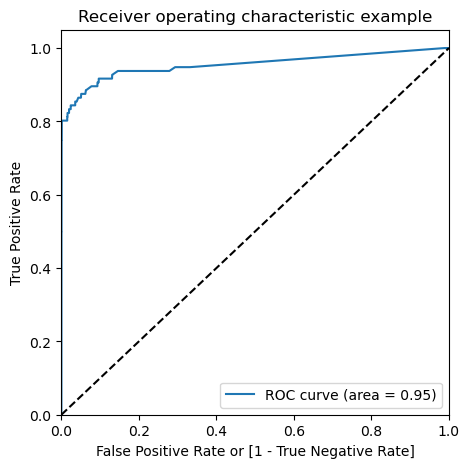

In [116]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)
plt.savefig('roc_curve8.jpg', dpi=300, bbox_inches='tight')

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.80
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.62
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.96

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as `XGBoost`, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


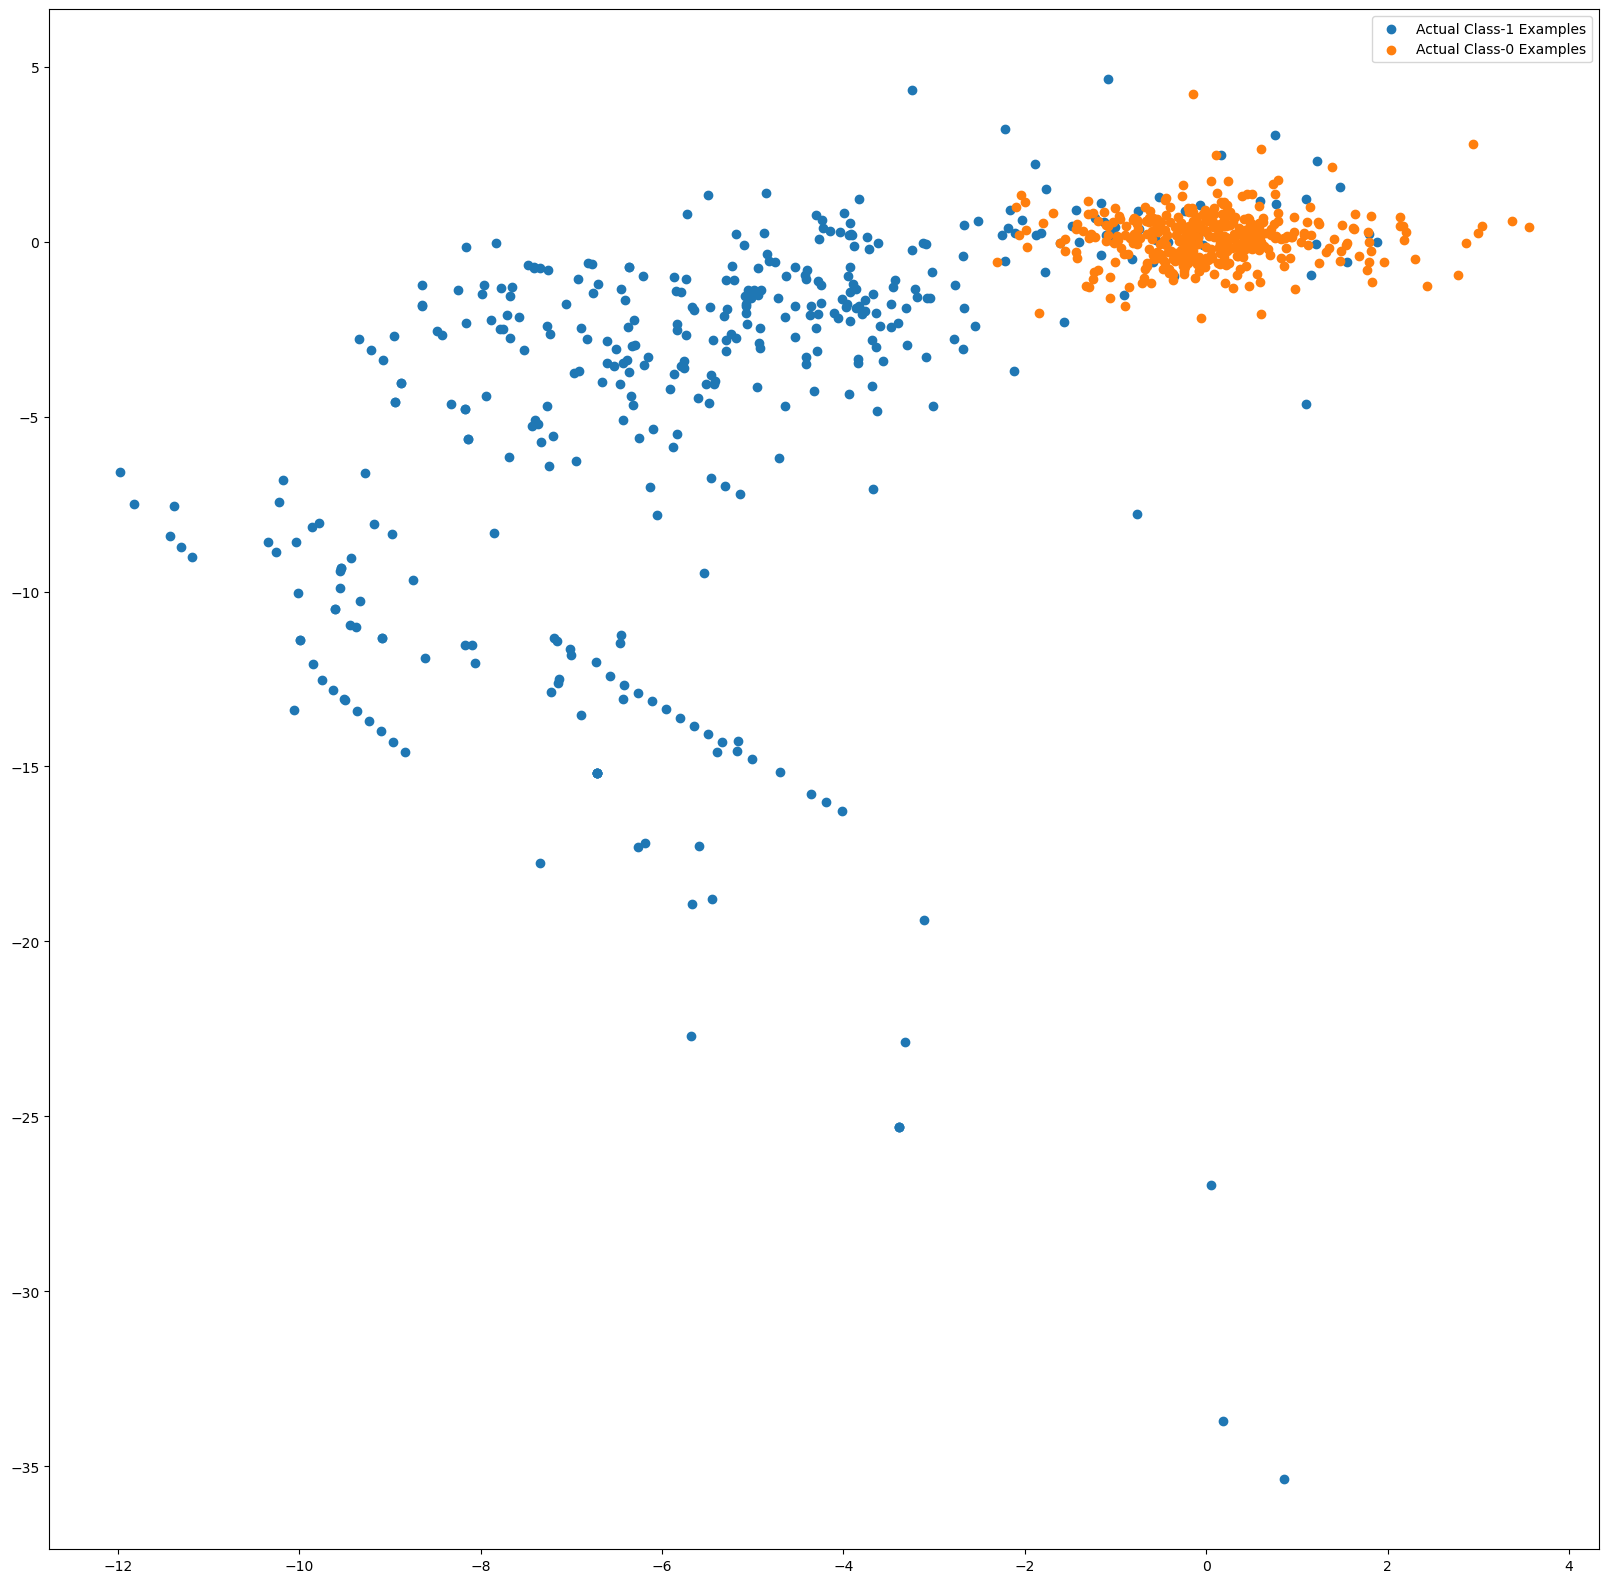

In [117]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.savefig('scatter.png')

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [118]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.82052475


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

# Handling data imbalance
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

- Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
- Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data. 
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

## Undersampling

In [119]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [120]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [121]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Model building on balanced data with Undersampling

### Logistic Regression

In [122]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [123]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014920,0.009260,0.005504,0.001304,0.01,{'C': 0.01},0.986486,0.990187,0.978686,0.983967,...,0.983675,0.004397,1,0.987558,0.987292,0.989153,0.987292,0.988701,0.987999,0.000777
1,0.011544,0.000428,0.004025,0.000673,0.1,{'C': 0.1},0.980922,0.989395,0.976282,0.984448,...,0.982599,0.004307,2,0.989645,0.989378,0.991312,0.988844,0.990005,0.989837,0.000829
2,0.013830,0.001440,0.003807,0.000736,1,{'C': 1},0.975676,0.987654,0.972115,0.985089,...,0.980723,0.005869,3,0.989974,0.991465,0.991949,0.989202,0.990453,0.990609,0.000993
3,0.015951,0.001927,0.004791,0.000980,10,{'C': 10},0.974563,0.984330,0.970513,0.984287,...,0.979612,0.005917,4,0.989954,0.992643,0.991890,0.989083,0.990553,0.990824,0.001289
4,0.034891,0.038355,0.004551,0.000621,100,{'C': 100},0.974563,0.982906,0.970513,0.984127,...,0.979295,0.005686,5,0.989824,0.992573,0.991840,0.989023,0.990473,0.990747,0.001298
5,0.018513,0.001461,0.004921,0.000814,1000,{'C': 1000},0.974563,0.982748,0.970513,0.984127,...,0.979264,0.005666,6,0.989834,0.992513,0.991840,0.989033,0.990463,0.990737,0.001278


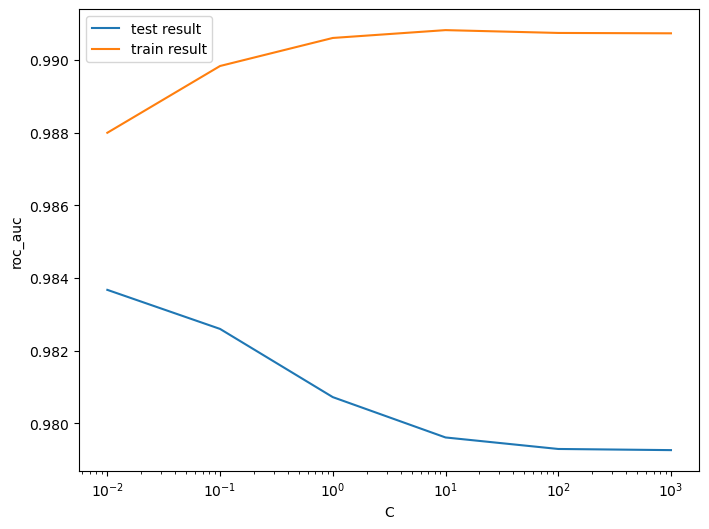

In [124]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.savefig('testvstrain.png')

In [125]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.983674991285677 at C = 0.01


#### Logistic regression with optimal C

In [126]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [127]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

In [128]:
##### Prediction on the train set

In [129]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[389   7]
 [ 30 366]]


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9532828282828283
Sensitivity:- 0.9242424242424242
Specificity:- 0.9823232323232324
F1-Score:- 0.951885565669701


In [133]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       396
           1       0.98      0.92      0.95       396

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [134]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [135]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.989490868278747

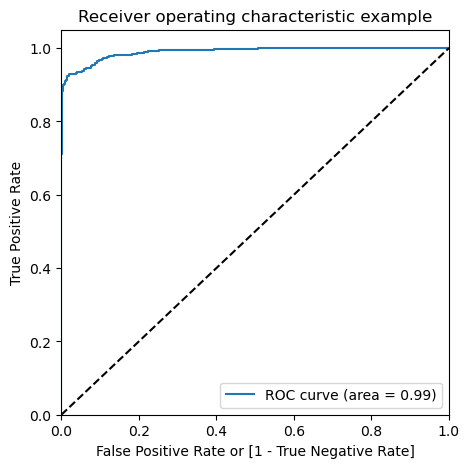

In [136]:
# Plot the ROC curvea
draw_roc(y_train_rus, y_train_pred_proba)
plt.savefig('roc_curve10.png', dpi=300, bbox_inches='tight')

#### Prediction on the test set

In [137]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [138]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55576  1290]
 [   12    84]]


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9771426565078474
Sensitivity:- 0.875
Specificity:- 0.9773150916188935


In [141]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [142]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [143]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9652292963575189

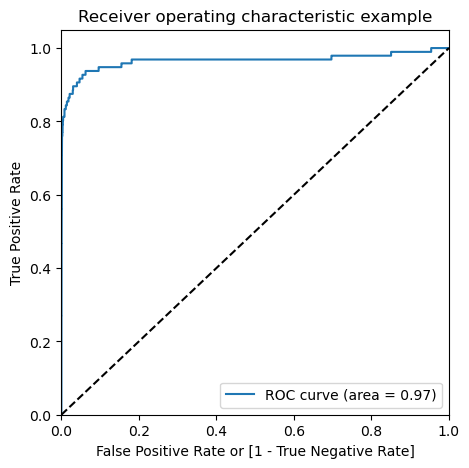

In [144]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.86
    - Specificity = 0.97
    - ROC = 0.96

### XGBoost

In [145]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [146]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.153916,0.027445,0.014444,0.001931,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975321,0.976986,0.976584,0.976297,0.000709,2,0.999440,0.999742,1.0,0.999727,0.000229
1,0.141004,0.002358,0.013914,0.000475,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978306,0.977789,0.972222,0.976106,0.002754,3,1.000000,1.000000,1.0,1.000000,0.000000
2,0.139976,0.003656,0.014089,0.000612,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978248,0.977789,0.976699,0.977579,0.000650,1,1.000000,1.000000,1.0,1.000000,0.000000
3,0.120481,0.001641,0.014140,0.000588,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.962466,0.971935,0.972796,0.969066,0.004680,5,0.999426,0.999928,1.0,0.999785,0.000255
4,0.123285,0.002366,0.013235,0.000403,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.963154,0.968607,0.974633,0.968798,0.004688,6,1.000000,1.000000,1.0,1.000000,0.000000
5,0.130166,0.000994,0.014175,0.000614,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.973714,0.976469,0.976125,0.975436,0.001226,4,1.000000,1.000000,1.0,1.000000,0.000000


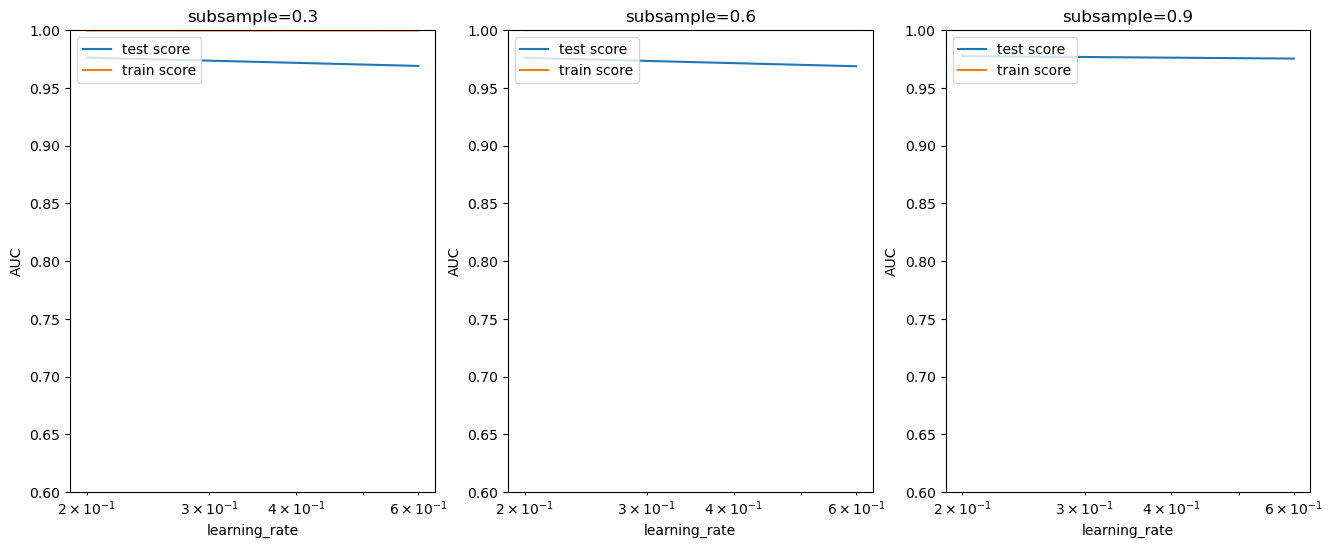

In [147]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [148]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [149]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [150]:
##### Prediction on the train set

In [151]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [152]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [155]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [156]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [157]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

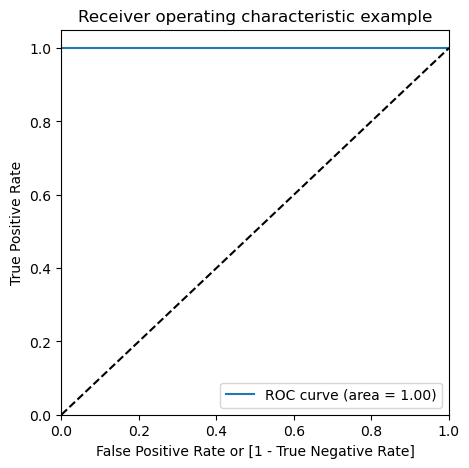

In [158]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [159]:
##### Prediction on the test set

In [160]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [161]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54612  2254]
 [   10    86]]


In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9602542045574243
Sensitivity:- 0.8958333333333334
Specificity:- 0.9603629585340977


In [164]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.90      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [165]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [166]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9742712949448411

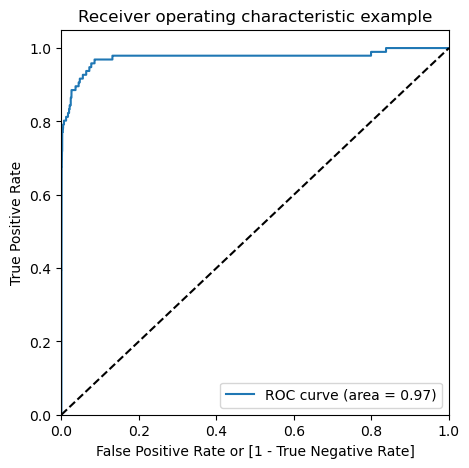

In [167]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.92
    - Specificity = 0.96
    - ROC-AUC = 0.98

### Decision Tree

In [168]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [169]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009972,0.000851,0.005011,0.000801,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.962006,0.966426,0.966454,0.964962,0.002090,1
1,0.010334,0.000465,0.005721,0.000505,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.958276,0.963958,0.966368,0.962867,0.003392,2
2,0.008513,0.000390,0.004689,0.000425,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.955234,0.954861,0.961633,0.957243,0.003108,5
3,0.008335,0.000999,0.004025,0.000038,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.955579,0.955091,0.960945,0.957205,0.002652,6
4,0.010655,0.001209,0.004933,0.000061,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.959912,0.963958,0.963527,0.962466,0.001814,4
5,0.010665,0.001244,0.005020,0.000044,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.958649,0.964159,0.965163,0.962657,0.002864,3
6,0.009021,0.000817,0.004851,0.000223,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.954890,0.952278,0.960600,0.955923,0.003475,7
7,0.008636,0.000503,0.005364,0.001286,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955406,0.952278,0.959022,0.955569,0.002755,8


In [170]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9649621212121212
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [171]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [172]:
##### Prediction on the train set

In [173]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[393   3]
 [ 53 343]]


In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9292929292929293
Sensitivity:- 0.8661616161616161
Specificity:- 0.9924242424242424


In [177]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       396
           1       0.99      0.87      0.92       396

    accuracy                           0.93       792
   macro avg       0.94      0.93      0.93       792
weighted avg       0.94      0.93      0.93       792



In [178]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [179]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9815356851341699

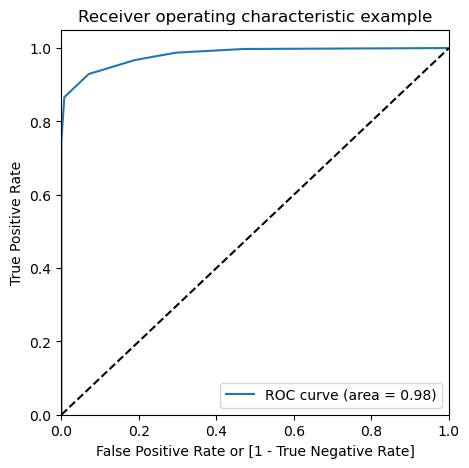

In [180]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [181]:
##### Prediction on the test set

In [182]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [183]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55815  1051]
 [   19    77]]


In [184]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [185]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9812155472069098
Sensitivity:- 0.8020833333333334
Specificity:- 0.9815179544895016


In [186]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [187]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [188]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9662830345314717

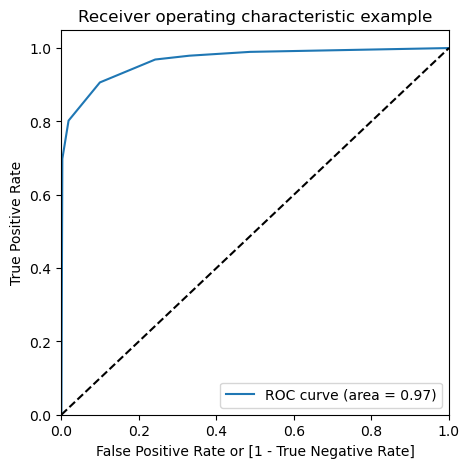

In [189]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.93
    - Sensitivity = 0.88
    - Specificity = 0.97
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.85
    - Specificity = 0.96
    - ROC-AUC = 0.96

### Random forest

In [190]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [191]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.977094174063871 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [192]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [193]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

In [194]:
##### Prediction on the train set

In [195]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [196]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[391   5]
 [ 41 355]]


In [197]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [198]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9419191919191919
Sensitivity:- 0.8964646464646465
Specificity:- 0.9873737373737373
F1-Score:- 0.9391534391534392


In [199]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       396
           1       0.99      0.90      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792



In [200]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [201]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9860090807060504

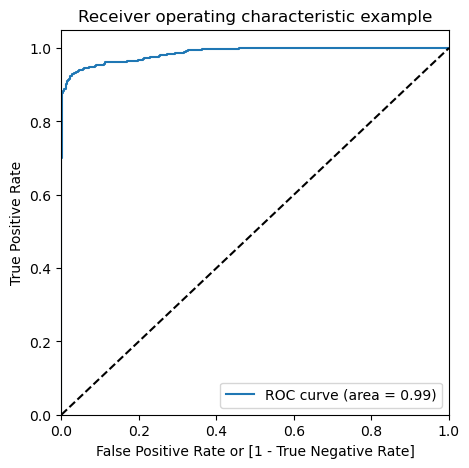

In [202]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [203]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [204]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55749  1117]
 [   16    80]]


In [205]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [206]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9801095467153541
Sensitivity:- 0.8333333333333334
Specificity:- 0.9803573312700031


In [207]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.83      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [208]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [209]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.976355599127774

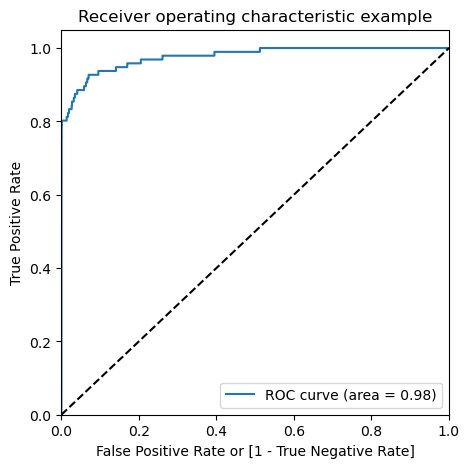

In [210]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.89
    - Specificity = 0.98
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.83
    - Specificity = 0.98
    - ROC-AUC = 0.97

# Oversampling

In [211]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [212]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [213]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


In [214]:
### Logistic Regression

In [215]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [216]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.695507,0.047432,0.063752,0.006902,0.01,{'C': 0.01},0.988275,0.988125,0.988769,0.988638,...,0.988428,0.000239,6,0.988429,0.988465,0.988387,0.988500,0.988466,0.988449,0.000039
1,1.532475,0.171819,0.067387,0.023258,0.1,{'C': 0.1},0.988281,0.988138,0.988793,0.988637,...,0.988441,0.000240,3,0.988446,0.988481,0.988400,0.988515,0.988481,0.988465,0.000039
2,1.480162,0.084002,0.061117,0.010505,1,{'C': 1},0.988280,0.988137,0.988795,0.988636,...,0.988441,0.000240,5,0.988448,0.988480,0.988400,0.988515,0.988480,0.988465,0.000039
3,1.516007,0.091220,0.059711,0.011886,10,{'C': 10},0.988280,0.988138,0.988794,0.988636,...,0.988441,0.000240,1,0.988448,0.988480,0.988400,0.988515,0.988481,0.988465,0.000039
4,1.490567,0.080875,0.061972,0.008216,100,{'C': 100},0.988280,0.988137,0.988794,0.988636,...,0.988441,0.000240,2,0.988448,0.988480,0.988400,0.988515,0.988480,0.988465,0.000039
5,1.485217,0.056797,0.063095,0.011718,1000,{'C': 1000},0.988280,0.988137,0.988794,0.988636,...,0.988441,0.000240,4,0.988448,0.988480,0.988400,0.988515,0.988480,0.988465,0.000039


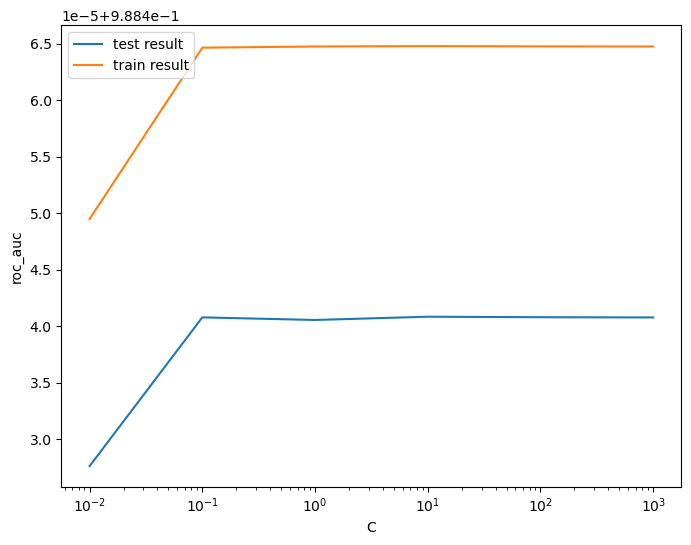

In [217]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.savefig('oversamp test vs train.png')

In [218]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884408440113459 at C = 10


In [219]:
#### Logistic regression with optimal C

In [220]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [221]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

In [222]:
##### Prediction on the train set

In [223]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [224]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222321   5128]
 [ 17791 209658]]


In [225]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [226]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9496172768400828
Sensitivity:- 0.9217802672247405
Specificity:- 0.9774542864554252
F1-Score:- 0.9481746130451004


In [227]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [228]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [229]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9884593381950988

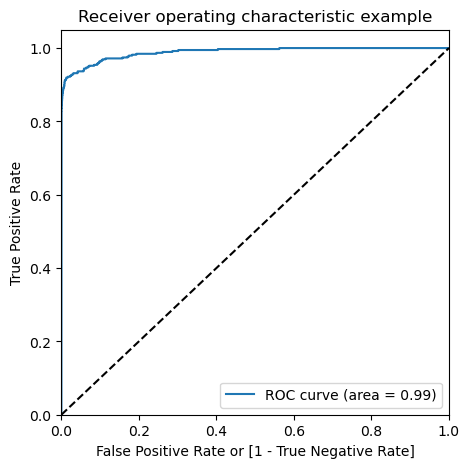

In [230]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [231]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [232]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55553  1313]
 [   11    85]]


In [233]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [234]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9767564341139707
Sensitivity:- 0.8854166666666666
Specificity:- 0.9769106320120986


In [235]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [236]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [237]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9707743130048418

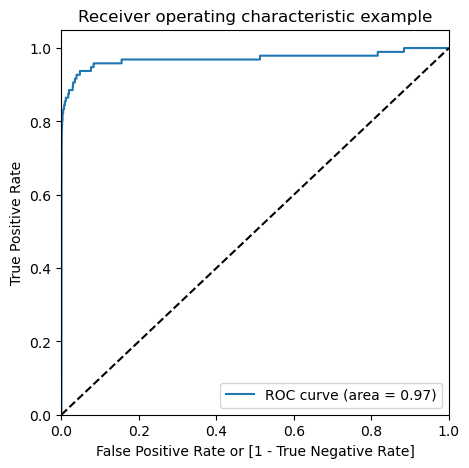

In [238]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.98
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.89
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [239]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [240]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.100588,0.037071,0.150164,0.010436,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999893,0.999922,0.999899,0.999905,0.000012,4,0.999909,0.999923,0.999918,0.999916,5.768834e-06
1,5.131745,0.007131,0.150656,0.012335,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999889,0.999915,0.999905,0.999903,0.000011,5,0.999909,0.999912,0.999913,0.999911,1.832194e-06
2,5.061915,0.049291,0.146915,0.011533,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999883,0.999911,0.999891,0.999895,0.000012,6,0.999901,0.999914,0.999913,0.999909,5.973288e-06
3,5.091900,0.005466,0.143593,0.006184,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999989,0.999985,0.999974,0.999983,0.000006,3,0.999998,0.999995,0.999997,0.999997,1.342421e-06
4,5.172248,0.045004,0.139571,0.010010,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999996,0.999996,0.999971,0.999988,0.000012,1,1.000000,0.999997,0.999999,0.999999,1.237535e-06
5,5.152393,0.050996,0.153110,0.007246,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999992,0.999992,0.999977,0.999987,0.000007,2,0.999999,0.999999,0.999999,0.999999,1.615153e-08


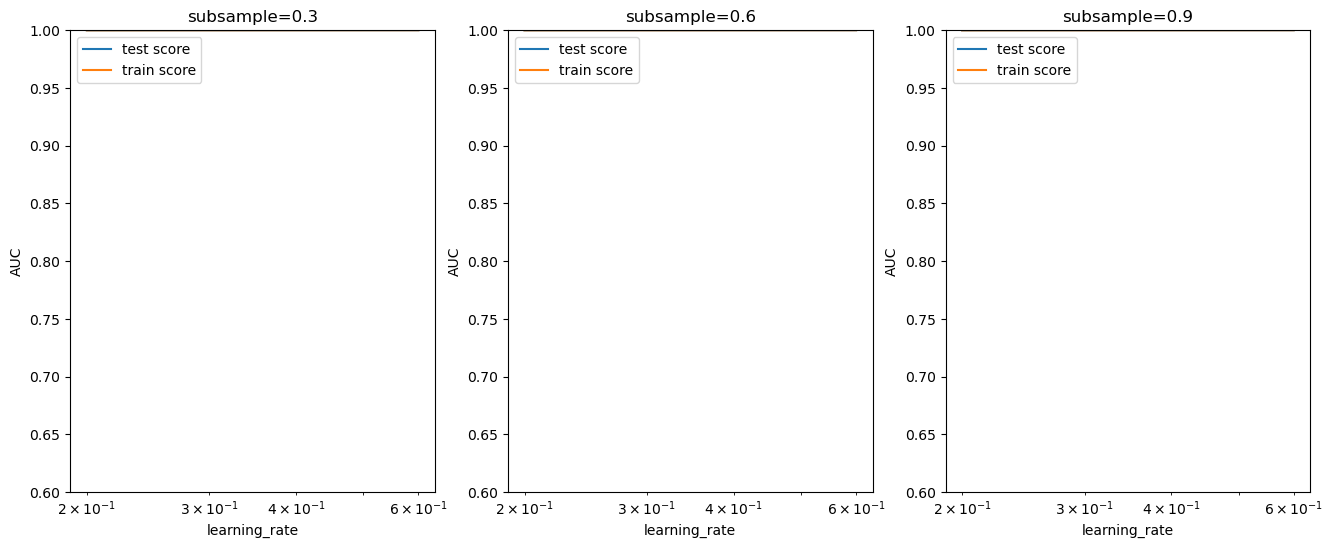

In [241]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')
    

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [242]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [243]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [244]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [245]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [246]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [247]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [248]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [249]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [250]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

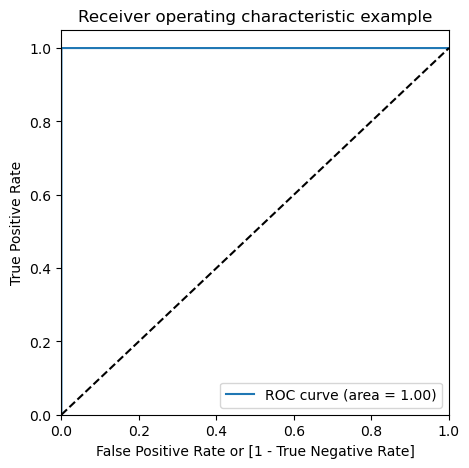

In [251]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [252]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [253]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56854    12]
 [   22    74]]


In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999403110845827
Sensitivity:- 0.7708333333333334
Specificity:- 0.9997889775964548


In [256]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.77      0.81        96

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [257]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [258]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9753250331187939

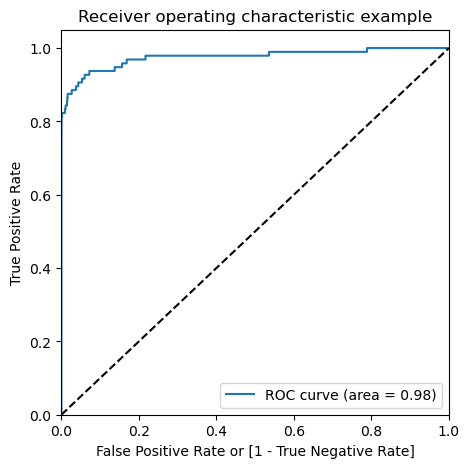

In [259]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.80
    - Specificity = 0.99
    - ROC-AUC = 0.97

### Decision Tree

In [260]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [261]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.901364,0.031335,0.087355,0.000415,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990022,0.990469,0.990206,0.990232,0.000183,5
1,5.848963,0.017904,0.089090,0.001288,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990022,0.990469,0.990206,0.990232,0.000183,5
2,5.824676,0.013328,0.088789,0.001503,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990003,0.990395,0.990119,0.990172,0.000165,8
3,5.889605,0.021267,0.086724,0.001564,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.989996,0.990395,0.990134,0.990175,0.000166,7
4,8.986588,0.068987,0.095717,0.004725,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999572,0.999642,0.999620,0.999611,0.000029,1
5,9.026986,0.151045,0.094602,0.005448,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999583,0.999625,0.999603,0.999604,0.000017,3
6,8.975211,0.053934,0.089825,0.001586,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999599,0.999650,0.999578,0.999609,0.000030,2
7,8.892224,0.072668,0.088816,0.001649,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999582,0.999594,0.999601,0.999592,0.000008,4


In [262]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996112168539758
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [263]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [264]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [265]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225919   1530]
 [     0 227449]]


In [266]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [267]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966366086463339
Sensitivity:- 1.0
Specificity:- 0.9932732172926678


In [268]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [269]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [270]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997622421629813

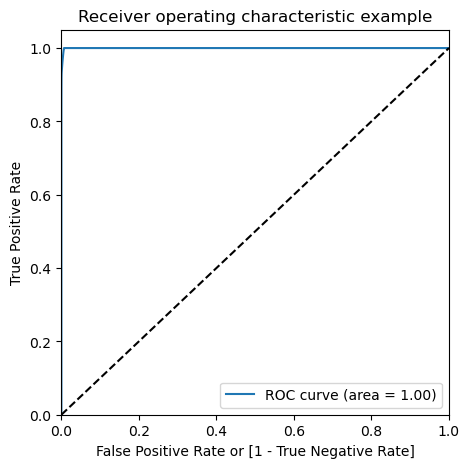

In [271]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [272]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [273]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56436   430]
 [   20    76]]


In [274]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [275]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920999964888874
Sensitivity:- 0.7916666666666666
Specificity:- 0.9924383638729645


In [276]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.79      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [277]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [278]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8948677043400274

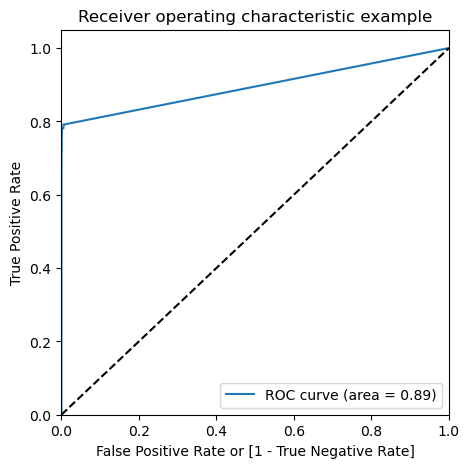

In [279]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.90

## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [280]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [287]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [286]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression

In [288]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [289]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.624926,0.135101,0.063480,0.006868,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,...,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,1.462994,0.059290,0.056044,0.002397,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,...,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,1.492009,0.066549,0.065961,0.016404,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,1.527234,0.075917,0.062460,0.011049,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,1.484370,0.063858,0.062188,0.015314,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,1.503397,0.057391,0.061951,0.017626,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


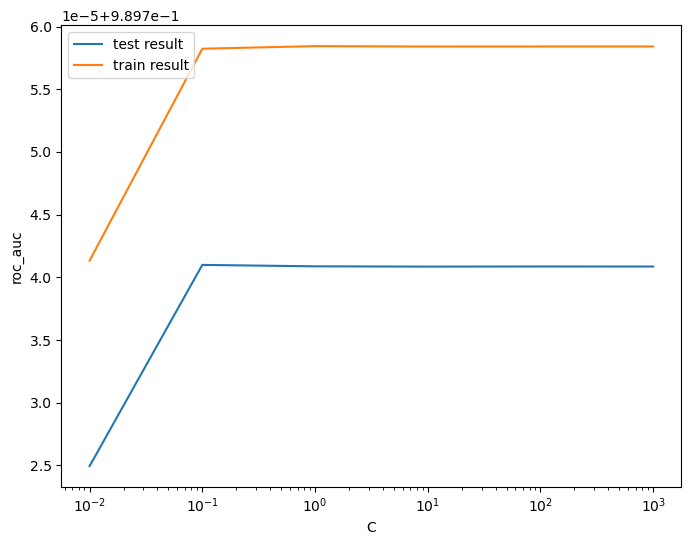

In [290]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [291]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


#### Logistic regression with optimal C

In [292]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [293]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [294]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [295]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221911   5538]
 [ 17693 209756]]


In [296]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [297]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [298]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [299]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

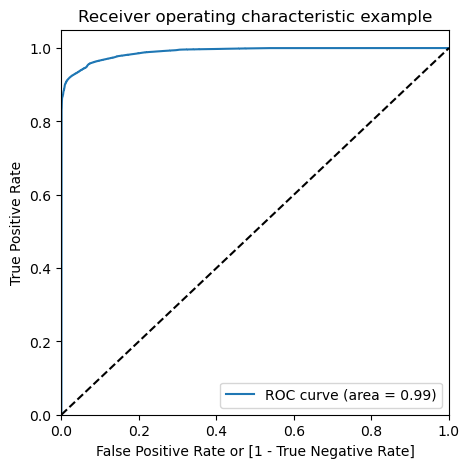

In [300]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [301]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [302]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


In [303]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [304]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [305]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



##### ROC on the test set

In [306]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

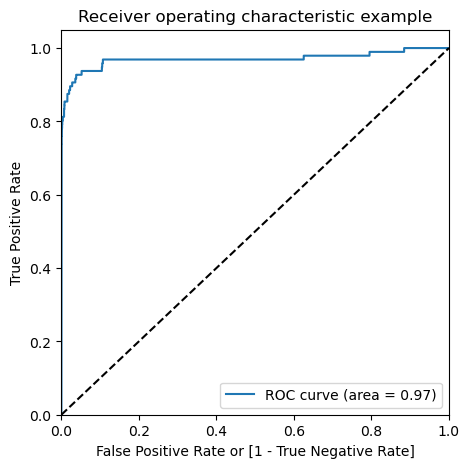

In [307]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.99
    - ROC = 0.97

### XGBoost

In [309]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [310]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.799082,0.084608,0.133645,0.003803,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999680,0.999733,0.999688,0.999700,0.000023,4,0.999734,0.999717,0.999732,0.999728,7.836593e-06
1,4.856707,0.031714,0.141670,0.006664,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999638,0.999685,0.999643,0.999655,0.000021,6,0.999697,0.999665,0.999700,0.999687,1.564702e-05
2,4.984709,0.049104,0.139300,0.003674,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999653,0.999713,0.999666,0.999677,0.000026,5,0.999709,0.999690,0.999717,0.999705,1.139169e-05
3,4.971517,0.125274,0.150895,0.011723,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999946,0.999949,0.999958,0.999951,0.000005,3,0.999971,0.999976,0.999983,0.999976,4.730254e-06
4,5.076459,0.137551,0.185013,0.070783,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999962,0.999960,0.999948,0.999957,0.000006,1,0.999978,0.999980,0.999980,0.999979,1.054078e-06
5,5.602577,0.129271,0.154477,0.007949,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999961,0.999959,0.999947,0.999956,0.000006,2,0.999975,0.999976,0.999977,0.999976,8.060376e-07


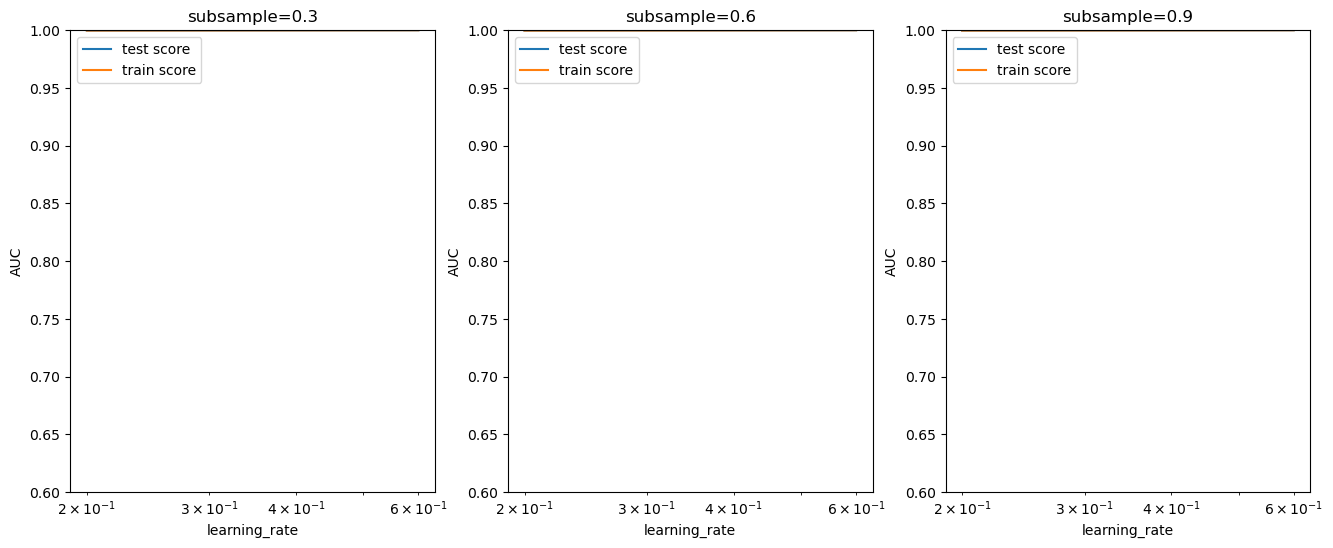

In [311]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [312]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [313]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [314]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [315]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227448      1]
 [     0 227449]]


In [316]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [317]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952


In [318]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [319]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [320]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9999999890785479

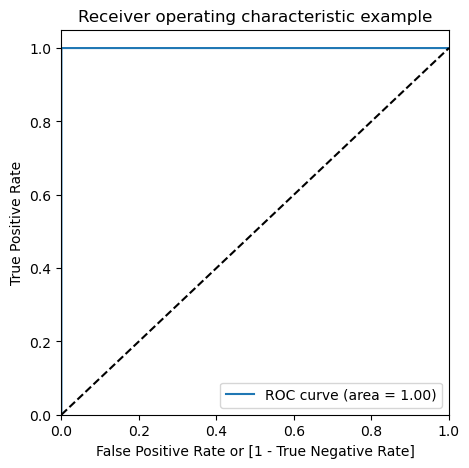

In [321]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [322]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [323]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56833    33]
 [   20    76]]


In [324]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [325]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507


In [326]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [327]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [328]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9553290117703608

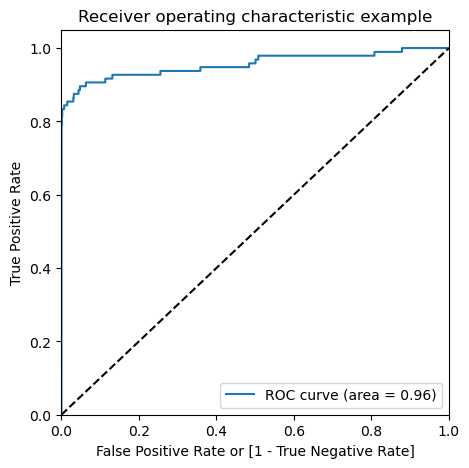

In [329]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [330]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [331]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.304470,0.493246,0.147668,0.007258,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985690,0.984839,0.985552,0.000535,5
1,11.870870,0.056634,0.131339,0.007478,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986116,0.985688,0.984837,0.985547,0.000531,6
2,11.064109,0.163799,0.112298,0.003853,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986069,0.985641,0.984773,0.985494,0.000539,7
3,10.992065,0.234536,0.128542,0.016476,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986064,0.985641,0.984776,0.985494,0.000536,8
4,19.668967,0.421700,0.114986,0.006447,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998143,0.998129,0.997965,0.998079,0.000081,2
5,19.358569,0.213420,0.108167,0.002911,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998144,0.998136,0.998040,0.998107,0.000047,1
6,19.324889,0.233316,0.116493,0.010476,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998099,0.998045,0.997924,0.998023,0.000073,3
7,19.779159,0.345243,0.116138,0.016108,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998074,0.998056,0.997886,0.998005,0.000085,4


In [332]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.998106625152596
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [333]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [334]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [335]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [336]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [337]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [338]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [339]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [340]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

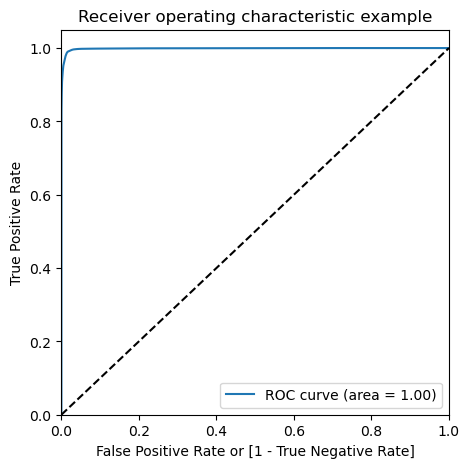

In [341]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [342]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [343]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [344]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [345]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [346]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [347]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [348]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

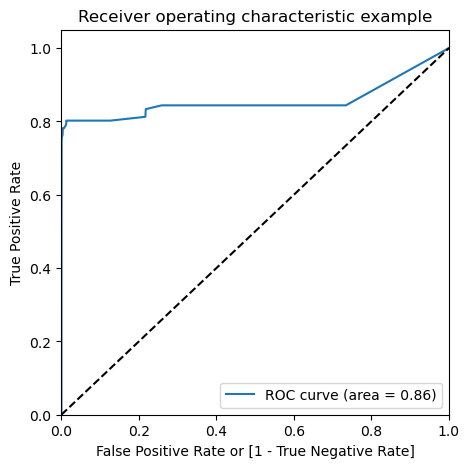

In [349]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.99
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


## AdaSyn (Adaptive Synthetic Sampling)

In [350]:
# Importing adasyn
from imblearn.over_sampling import ADASYN
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [351]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


### Logistic Regression

In [352]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [353]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.701048,0.039784,0.123297,0.006508,0.01,{'C': 0.01},0.963472,0.962327,0.963273,0.963024,0.000499,6,0.962770,0.963211,0.963172,0.963051,0.000199
1,1.821585,0.108123,0.141499,0.025693,0.1,{'C': 0.1},0.963578,0.962435,0.963370,0.963128,0.000497,5,0.962881,0.963305,0.963272,0.963153,0.000192
2,1.859809,0.075664,0.112327,0.008027,1,{'C': 1},0.963585,0.962442,0.963376,0.963134,0.000497,4,0.962890,0.963312,0.963278,0.963160,0.000191
3,1.836557,0.054778,0.125976,0.017857,10,{'C': 10},0.963585,0.962443,0.963377,0.963135,0.000496,3,0.962891,0.963312,0.963279,0.963161,0.000191
4,1.815932,0.090269,0.112386,0.009389,100,{'C': 100},0.963585,0.962443,0.963377,0.963135,0.000496,2,0.962891,0.963312,0.963279,0.963161,0.000191
5,1.878241,0.092269,0.135671,0.013976,1000,{'C': 1000},0.963585,0.962443,0.963377,0.963135,0.000496,1,0.962891,0.963312,0.963279,0.963161,0.000191


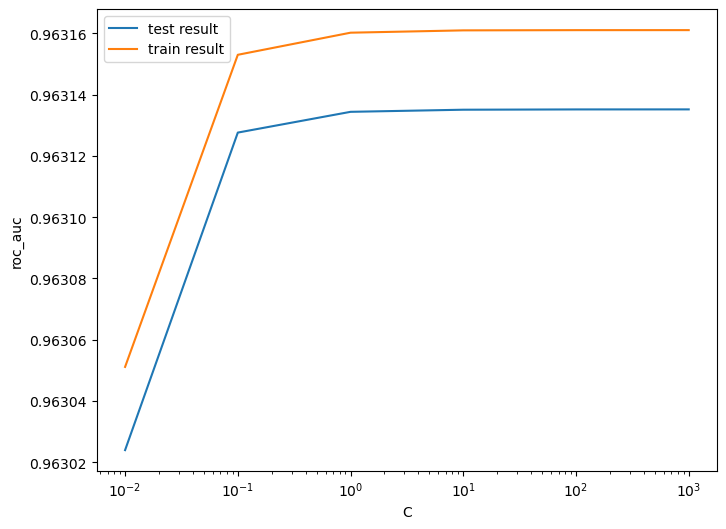

In [354]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [355]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.963135148223901 at C = 1000


#### Logistic regression with optimal C

In [356]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [357]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [358]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [359]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207019  20430]
 [ 31286 196162]]


In [360]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [361]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [362]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [363]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [364]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631610160068507

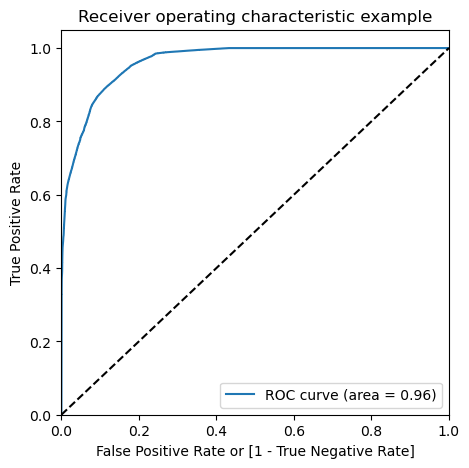

In [365]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [366]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [367]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51642  5224]
 [    4    92]]


In [368]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [369]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [370]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [371]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [372]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

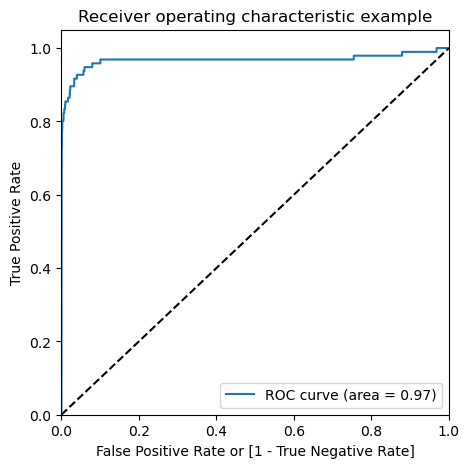

In [373]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

### Decision Tree

In [374]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [375]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.384526,0.178552,0.111727,0.009551,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920356,0.909332,0.910882,0.007187,7
1,10.020456,0.152435,0.102664,0.004384,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.909332,0.910882,0.007186,8
2,9.913303,0.262129,0.107685,0.009785,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920316,0.911441,0.911572,0.007087,5
3,10.237947,0.423646,0.118474,0.015734,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920317,0.910801,0.911359,0.007098,6
4,18.134793,0.422933,0.106372,0.005462,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935309,0.946351,0.935441,0.939034,0.005174,4
5,18.796324,0.729616,0.105118,0.006034,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935360,0.947021,0.937706,0.940029,0.005036,3
6,18.184778,0.587944,0.131694,0.029522,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.937848,0.946025,0.941362,0.941745,0.003349,1
7,22.179523,3.541488,0.161967,0.036436,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936499,0.945941,0.942667,0.941703,0.003915,2


In [376]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9417445885847004
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [377]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [378]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [379]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


In [380]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [381]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [382]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [383]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [384]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

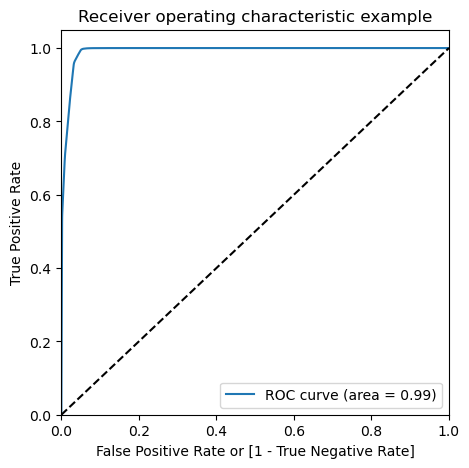

In [385]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [386]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [387]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


In [388]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [389]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [390]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [391]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [392]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

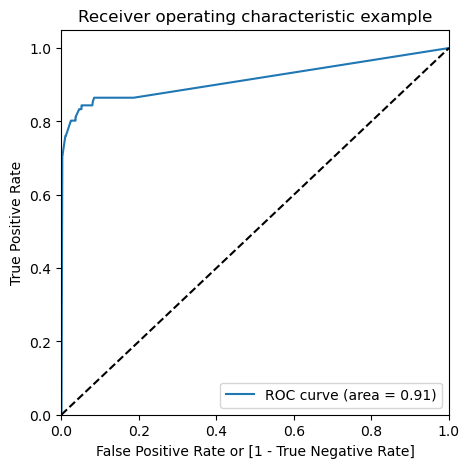

In [393]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.95
    - Sensitivity = 0.84
    - Specificity = 0.95
    - ROC-AUC = 0.91

### XGBoost

In [394]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [395]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.224710,1.427714,0.363950,0.055401,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975756,0.996402,0.993919,0.988692,0.009203,4,0.999297,0.998992,0.999160,0.999150,0.000125
1,14.038940,2.316840,0.296062,0.017745,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976063,0.995996,0.995207,0.989088,0.009216,3,0.999291,0.999086,0.999233,0.999203,0.000086
2,17.917766,0.085596,0.599298,0.031286,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.976420,0.996090,0.993491,0.988667,0.008725,6,0.999310,0.999026,0.999176,0.999171,0.000116
3,18.435838,1.286795,0.546956,0.019075,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974789,0.996623,0.994658,0.988690,0.009862,5,0.999911,0.999935,0.999933,0.999926,0.000011
4,14.871563,1.073854,0.486828,0.047799,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975207,0.997983,0.996377,0.989856,0.010379,1,0.999917,0.999937,0.999931,0.999928,0.000009
5,12.910888,0.113317,0.452925,0.008358,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.974465,0.996719,0.997379,0.989521,0.010649,2,0.999941,0.999934,0.999956,0.999944,0.000009


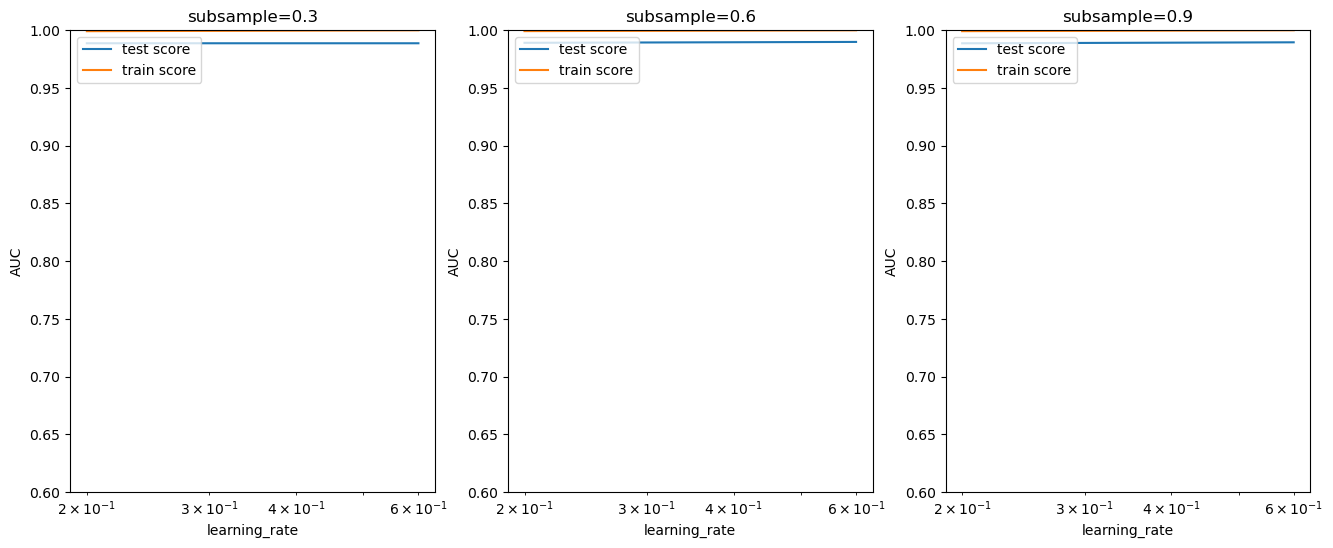

In [396]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [397]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [398]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

In [399]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [400]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [401]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [402]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999934051004953
Sensitivity:- 1.0
Specificity:- 1.0


In [403]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [404]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [405]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

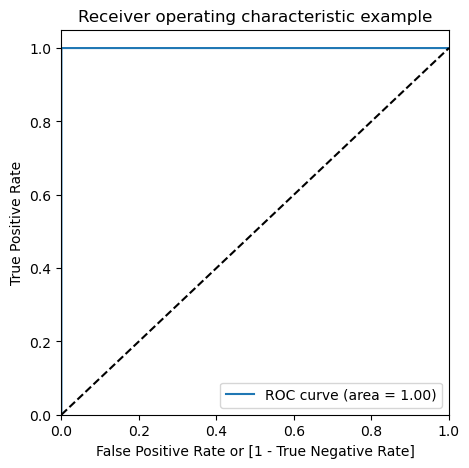

In [406]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [407]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [408]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56828    38]
 [   22    74]]


In [409]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [410]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989466661985184
Sensitivity:- 0.7708333333333334
Specificity:- 0.9993317623887736


In [411]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.77      0.71        96

    accuracy                           1.00     56962
   macro avg       0.83      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [412]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [413]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.951038589256615

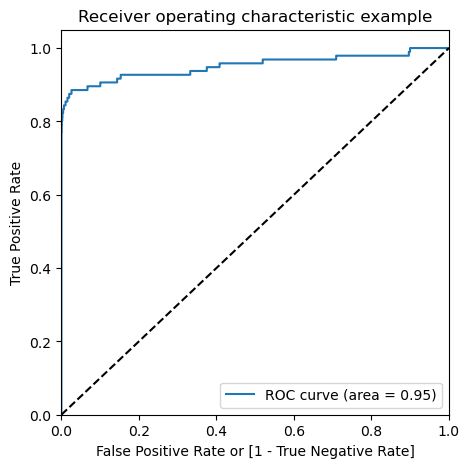

In [414]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC = 0.96

### Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model. 

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the `Logistic regression model with SMOTE` is the best model for its simlicity and less resource requirement. 

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high. 

## Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.

# here i have given the pickel but there is not required to have it

In [417]:
import pickle

# Save the best model to a pickle file
with open('credit_card_abhi.pkl', 'wb') as f:
  pickle.dump(xgb_model, f)

In [418]:
# Load the pickled model :

with open('credit_card_abhi', 'rb') as f:
    loaded_model = pickle.load(f)